In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
m_lgb_1 = pd.read_csv('lgb_1.csv') # 0.7702712482
m_lgb_2 = pd.read_csv('lgb_2.csv') # 0.7130761298
m_lgb_3 = pd.read_csv('lgb_3.csv') # 0.7437786203
m_lgb_4 = pd.read_csv('lgb_4.csv') # 0.69310 
m_cb_1 = pd.read_csv('cb_1.csv') # 0.6630532266

In [69]:
zero_df = pd.concat([m_lgb_1.iloc[:,1],m_lgb_2.iloc[:,1],m_lgb_3.iloc[:,1],m_lgb_4.iloc[:,1],m_cb_1.iloc[:,1]],axis=1)
zero_df.columns = ['m_lgb_1','m_lgb_2','m_lgb_3','m_lgb_4','m_cb_1']

In [70]:
one_df = pd.concat([m_lgb_1.iloc[:,2],m_lgb_2.iloc[:,2],m_lgb_3.iloc[:,2],m_lgb_4.iloc[:,2],m_cb_1.iloc[:,2]],axis=1)
one_df.columns = ['m_lgb_1','m_lgb_2','m_lgb_3','m_lgb_4','m_cb_1']

In [71]:
two_df = pd.concat([m_lgb_1.iloc[:,3],m_lgb_2.iloc[:,3],m_lgb_3.iloc[:,3],m_lgb_4.iloc[:,3],m_cb_1.iloc[:,3]],axis=1)
two_df.columns = ['m_lgb_1','m_lgb_2','m_lgb_3','m_lgb_4','m_cb_1']

In [72]:
sum_corr_df = zero_df.corr() + one_df.corr() + two_df.corr()

In [77]:
mean_corr_df = sum_corr_df.applymap(lambda x: x/3)

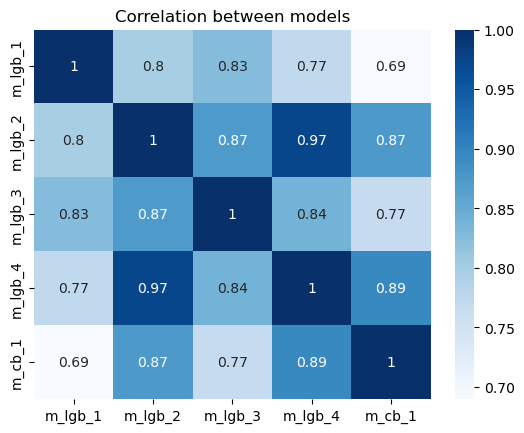

In [79]:
g = sns.heatmap(mean_corr_df,annot=True, cmap='Blues')
g.set_title("Correlation between models") 
plt.show()

In [56]:
one_df

,m_lgb_1,m_lgb_2,m_lgb_3,m_cb_1
0,0.166506,0.205766,0.136377,0.153733
1,0.235005,0.291648,0.162013,0.247467
2,0.183552,0.087705,0.134066,0.069966
3,0.097634,0.127479,0.122308,0.099057
4,0.161024,0.169180,0.163946,0.226101
...,...,...,...,...
9995,0.120462,0.174791,0.197987,0.230740
9996,0.276256,0.200492,0.179534,0.178705
9997,0.082901,0.058922,0.146799,0.116268
9998,0.250776,0.250994,0.179099,0.335299


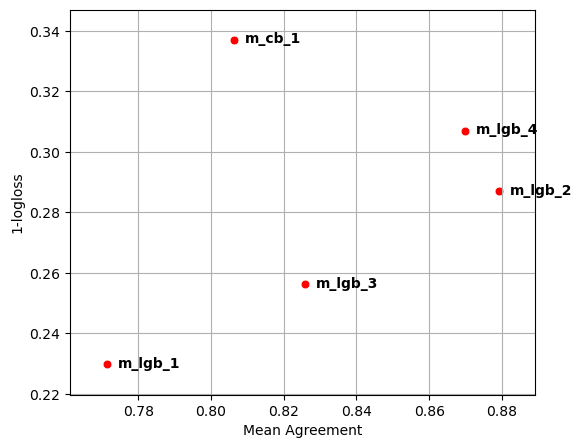

In [104]:
corr_zero = (zero_df.corr().sum()-1)/(zero_df.corr().shape[0]-1)  
corr_one = (one_df.corr().sum()-1)/(one_df.corr().shape[0]-1)  
corr_two = (two_df.corr().sum()-1)/(two_df.corr().shape[0]-1)

corr_sum = corr_zero + corr_one + corr_two
corr_mean = corr_sum.apply(lambda x: x/3)

names = corr.index.str[:]

logloss = [0.7702712482,0.7130761298,0.7437786203,0.69310,0.6630532266]
minus_logloss = pd.Series(logloss).apply(lambda x: (1-x)).to_list()


df = pd.DataFrame({'model': names, 'logloss': minus_logloss, 'cor': corr_mean})

plt.figure(figsize=(6,5))

g = sns.scatterplot(x="cor", y="logloss", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.logloss[line]-0.001, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.logloss.min()-0.01,df.logloss.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('1-logloss')
plt.grid()
plt.show()

In [101]:
minus_logloss = pd.Series(logloss).apply(lambda x: (1-x)).to_list()

[0.22972875179999996,
 0.2869238702,
 0.25622137970000003,
 0.30689999999999995,
 0.3369467734]

In [110]:
m_cb_1['index']

0       26457
1       26458
2       26459
3       26460
4       26461
        ...  
9995    36452
9996    36453
9997    36454
9998    36455
9999    36456
Name: index, Length: 10000, dtype: int64

In [122]:
m_cb_1.columns[1:]

Index(['0', '1', '2'], dtype='object')

In [135]:
#submission =

sum_sub = m_cb_1.drop(['index'],axis=1)+ m_lgb_1.drop(['index'],axis=1)+ m_lgb_2.drop(['index'],axis=1)
sum_sub.columns = [0,1,2]
submission = sum_sub.applymap(lambda x: x/3)
submission.insert(0,'index',m_cb_1['index'])

In [136]:
submission.to_csv('ensemble_cb1.lgb2.lgb4.csv')

In [132]:
submission.columns[1:]

Index([0, 1, 2], dtype='object')

In [133]:
m_cb_1

,index,0,1,2
0,26457,0.112904,0.153733,0.733363
1,26458,0.294770,0.247467,0.457763
2,26459,0.037797,0.069966,0.892237
3,26460,0.052984,0.099057,0.847959
4,26461,0.091776,0.226101,0.682123
...,...,...,...,...
9995,36452,0.074209,0.230740,0.695051
9996,36453,0.308104,0.178705,0.513191
9997,36454,0.053700,0.116268,0.830031
9998,36455,0.136704,0.335299,0.527997
